# Clustering songs with Spotify Data

In [1]:
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
df =pd.read_csv('dataset.csv')
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [3]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

Prepocessing data:

In [4]:
df=df.dropna()

In [5]:
song_specific_cols=['Unnamed: 0','track_id','artists','album_name','track_name']
df_specific=df[song_specific_cols].copy()
df_features=df.drop( columns=song_specific_cols)
df_features=df_features.drop(columns=['explicit'])

In [6]:
df_track_genre_features=df_features['track_genre']
df_features=df_features.drop(columns=['track_genre'])

In [7]:
df_track_genre_features=pd.get_dummies(df_track_genre_features,columns=['track_genre'],dtype=int)

In [8]:
scaler=StandardScaler()
features_scaled=scaler.fit_transform(df_features)

In [9]:
features_scaled

array([[ 1.78262366,  0.0245569 ,  0.62923855, ...,  0.92931467,
        -1.14185449,  0.2218242 ],
       [ 0.97562469, -0.7308889 , -0.84590813, ..., -0.79868091,
        -1.48970775,  0.2218242 ],
       [ 1.06529124, -0.16035285, -0.74218688, ..., -1.36567947,
        -1.52830252,  0.2218242 ],
       ...,
       [-0.50387342,  0.40481485,  0.35841084, ...,  1.0373144 ,
         0.34125863,  0.2218242 ],
       [ 0.34795883,  0.52063508,  0.11639459, ..., -0.23553949,
         0.46074562,  0.2218242 ],
       [-0.50387342,  0.12856863, -0.23510521, ...,  0.90231474,
        -1.43269958,  0.2218242 ]])

In [10]:
df_scaled=pd.DataFrame(features_scaled,columns=df_features.columns)
df_scaled

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1.782624,0.024557,0.629239,-0.717147,-1.210434,0.300825,-1.326297,0.551843,-0.850193,-0.504111,0.758735,0.929315,-1.141854,0.221824
1,0.975625,-0.730889,-0.845908,-1.889974,-1.210434,-1.784739,0.753979,-0.078995,1.831744,-0.504097,-0.591216,-0.798681,-1.489708,0.221824
2,1.065291,-0.160353,-0.742187,-1.122667,-1.491334,-0.293289,0.753979,-0.273827,-0.315489,-0.504115,-0.507172,-1.365679,-1.528303,0.221824
3,1.692957,-0.243236,-1.733301,-2.312987,-1.491334,-2.039246,0.753979,-0.457309,1.774605,-0.503886,-0.428381,-1.276965,1.987857,-2.089669
4,2.186123,-0.271942,0.295026,-0.788709,-0.929534,-0.282751,0.753979,-0.303146,0.463409,-0.504115,-0.686290,-1.184394,-0.073343,0.221824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,-0.548707,1.462948,-2.274956,-1.615652,-0.086833,-1.617321,0.753979,-0.401507,0.977663,2.493742,-0.668431,-1.697779,0.128337,2.533318
113995,-0.503873,1.462957,-2.263432,-2.084782,-1.491334,-2.000075,-1.326297,-0.421369,2.042258,2.648803,-0.570205,-1.693536,-1.231186,0.221824
113996,-0.503873,0.404815,0.358411,-1.241937,-1.491334,-0.524135,-1.326297,-0.403399,1.660327,-0.504115,-0.681038,1.037314,0.341259,0.221824
113997,0.347959,0.520635,0.116395,-0.538241,0.474967,-0.522942,0.753979,-0.519731,0.198764,-0.504115,0.296495,-0.235539,0.460746,0.221824


In [11]:
df_scaled_new=pd.concat([df_scaled,df_track_genre_features],axis=1)

In [12]:
df_scaled_new=df_scaled_new.dropna()
df_specific=df_specific.loc[df_scaled_new.index]
df_scaled_new

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
0,1.782624,0.024557,0.629239,-0.717147,-1.210434,0.300825,-1.326297,0.551843,-0.850193,-0.504111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.975625,-0.730889,-0.845908,-1.889974,-1.210434,-1.784739,0.753979,-0.078995,1.831744,-0.504097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.065291,-0.160353,-0.742187,-1.122667,-1.491334,-0.293289,0.753979,-0.273827,-0.315489,-0.504115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.692957,-0.243236,-1.733301,-2.312987,-1.491334,-2.039246,0.753979,-0.457309,1.774605,-0.503886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.186123,-0.271942,0.295026,-0.788709,-0.929534,-0.282751,0.753979,-0.303146,0.463409,-0.504115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,-0.548707,1.462948,-2.274956,-1.615652,-0.086833,-1.617321,0.753979,-0.401507,0.977663,2.493742,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113995,-0.503873,1.462957,-2.263432,-2.084782,-1.491334,-2.000075,-1.326297,-0.421369,2.042258,2.648803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113996,-0.503873,0.404815,0.358411,-1.241937,-1.491334,-0.524135,-1.326297,-0.403399,1.660327,-0.504115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
113997,0.347959,0.520635,0.116395,-0.538241,0.474967,-0.522942,0.753979,-0.519731,0.198764,-0.504115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Using the elbow method to find a good k values for kmeans.

In [ ]:
possible_k=[2,3,5,7,10,15,20,30,40,50]# added a few k values to make the plot more clear
sse = []

for k in possible_k:
  print(f'Testing fork ={k}')
  kmeans=KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_scaled_new)
  sse.append(kmeans.inertia_)

Testing fork =2
Testing fork =3
Testing fork =5
Testing fork =7
Testing fork =10
Testing fork =15
Testing fork =20
Testing fork =30
Testing fork =40
Testing fork =50


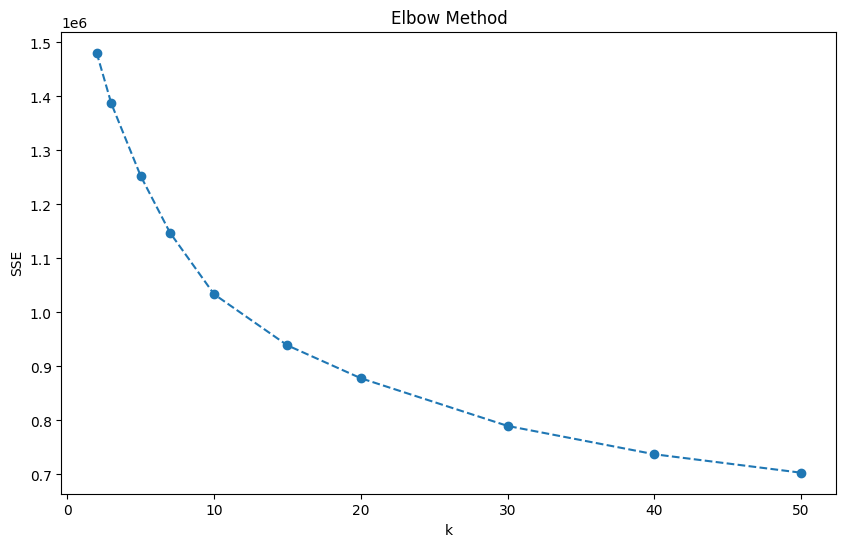

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(possible_k,sse,marker='o')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

There is not a clear k that dramatically changes the slope. We will go with k=10, as it seems to have a decent impact.

In [13]:
kmeans_final=KMeans(n_clusters=10,random_state=42)
kmeans_final.fit(df_scaled_new)

KMeans(n_clusters=10, random_state=42)

We will try to plot the main genre for each detected cluster.

In [14]:
df_specific['cluster']=kmeans_final.labels_
df_specific['genre']=df['track_genre']
df_specific

,Unnamed: 0,track_id,artists,album_name,track_name,cluster,genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,7,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,1,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,9,acoustic
...,...,...,...,...,...,...,...
113994,113994,4WbOUe6T0sozC7z5ZJgiAA,Lucas Cervetti,Frecuencias Álmicas en 432hz,"Frecuencia Álmica, Pt. 4",3,world-music
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,3,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,4,world-music


In [15]:
results = []
for cluster_id in range(10):
  cluster_data =df_specific[df_specific['cluster']==cluster_id]
  genre_counts=cluster_data['genre'].value_counts(normalize=True)
  top_genre=genre_counts.index[0]
  top_percentage=genre_counts.iloc[0]
  results.append({'Cluster': cluster_id,
    'Genre': top_genre,
    'Percentage': top_percentage
  })

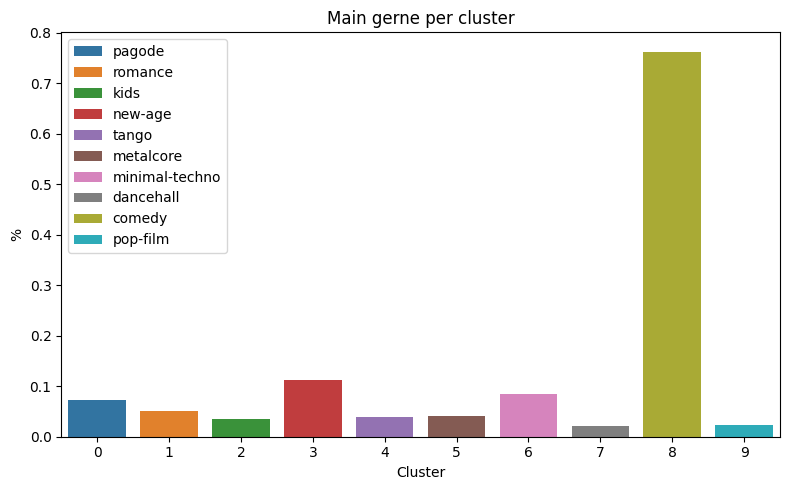

In [16]:
df_hugh_genre=pd.DataFrame(results)
plt.figure(figsize=(8,5))
sns.barplot(data=df_hugh_genre,x='Cluster',y='Percentage',hue='Genre')
plt.title('Main gerne per cluster')
plt.ylabel('%')
plt.legend()
plt.tight_layout()
plt.show()

# Finding 3 similar songs to a specific one.

Trying to find a song that I like :)

In [17]:
found_songs=df_specific[df_specific['artists'].str.contains('Eminem')]
print(found_songs[['artists','track_name']])

                                   artists  \
20413                          Akon;Eminem   
37220                       Dr. Dre;Eminem   
37251           Dr. Dre;Eminem;Skylar Grey   
37302                       Dr. Dre;Eminem   
37355                Dr. Dre;Eminem;Xzibit   
48068              Xzibit;Eminem;Nate Dogg   
48117      Royce Da 5'9";Eminem;King Green   
48163                      Nas;Eminem;EPMD   
48200          The Notorious B.I.G.;Eminem   
48359          The Notorious B.I.G.;Eminem   
48361                        Xzibit;Eminem   
48363          Tony Yayo;Eminem;Obie Trice   
48462                Obie Trice;D12;Eminem   
48607     Funk Flex;Big Kap;Eminem;Dr. Dre   
48706  Fat Joe;Eminem;Lil Jon;Mase;Remy Ma   
48860            Obie Trice;50 Cent;Eminem   
51159                               Eminem   
51216                               Eminem   
51277                     Eminem;Nate Dogg   
51301                          Eminem;Dido   
51320                    Eminem;Ju

In [18]:
selected_song_idx =51159

In [19]:
target_song=df_specific.iloc[selected_song_idx]
target_cluster=target_song['cluster']
target_song

,51159
Unnamed: 0,51159
track_id,7lQ8MOhq6IN2w8EYcFNSUk
artists,Eminem
album_name,The Eminem Show
track_name,Without Me
cluster,9
genre,hip-hop


In [20]:
cluster_indices= df_specific[df_specific['cluster']==target_cluster].index
cluster_features= df_scaled_new.loc[cluster_indices].values

In [21]:
target_features=df_scaled_new.loc[selected_song_idx].values.reshape(1, -1)
dists=euclidean_distances(target_features, cluster_features).flatten()

In [22]:
sim_df =pd.DataFrame({'index':cluster_indices,'distance':dists})

In [24]:
song_recommend =sim_df[sim_df['index']!=selected_song_idx].sort_values('distance').head(3)

for idx in song_recommend['index']:
  rec_song = df_specific.loc[idx]
  print(f"{rec_song['track_name']} ---- Artist: {rec_song['artists']} -- Genre: {rec_song['genre']}")

goosebumps ---- Artist: Travis Scott -- Genre: hip-hop
Unforgettable ---- Artist: French Montana;Swae Lee -- Genre: hip-hop
All The Stars (with SZA) ---- Artist: Kendrick Lamar;SZA -- Genre: hip-hop


These songs have a lot of similarities with 'Without me'. They are in the same genre and were also big hits. It make sense that they were recommended, if we consider the features that we have.

In [27]:
cosine_dists =cosine_distances(target_features,cluster_features).flatten()
cosine_sim_df =pd.DataFrame({'index': cluster_indices,'distance':cosine_dists})
cosine_song_recommend =cosine_sim_df[cosine_sim_df['index']!=selected_song_idx].sort_values('distance').head(3)

for idx2 in cosine_song_recommend['index']:
  rec_song2 = df_specific.loc[idx2]
  print(f"{rec_song2['track_name']} ---- Artist: {rec_song2['artists']} -- Genre: {rec_song2['genre']}")

goosebumps ---- Artist: Travis Scott -- Genre: hip-hop
Unforgettable ---- Artist: French Montana;Swae Lee -- Genre: hip-hop
All The Stars (with SZA) ---- Artist: Kendrick Lamar;SZA -- Genre: hip-hop


Trying the same procedure with a different similarity results in the same recommendations.

# DBSCAN

Now we will try to cluster the songs using dbscan.

In [28]:
dbscan=DBSCAN(eps=3)

In [29]:
clusters_dbscan=dbscan.fit(df_scaled_new)

In [32]:
clusters_dbscan.labels_, len(clusters_dbscan.labels_), np.unique(clusters_dbscan.labels_)

(array([0, 0, 0, ..., 0, 0, 0]),
 113998,
 array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8]))

The number of clusters is 9 (-1 is considered noise accroding to the documentation), pretty close to the 10 we found with elbow method.